In [2]:
#import plot
import os
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#read text from /scratch/groups/rondror/marvinli/combind_fragment/combind_utils/refit/fragment_refit_merge/A5H660/native_contact.de
import sys
import pandas as pd
native_contact = pd.read_csv('/scratch/groups/rondror/marvinli/combind_fragment/combind_utils/refit/fragment_refit_merge/A5H660/native_contact.de', sep='\s+', header=None)

<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_226461/3969178191.py:4: SyntaxWarning: invalid escape sequence '\s'
  native_contact = pd.read_csv('/scratch/groups/rondror/marvinli/combind_fragment/combind_utils/refit/fragment_refit_merge/A5H660/native_contact.de', sep='\s+', header=None)


In [23]:
def read_simple_data_file(filepath: str) -> tuple:
    """
    Simple function to read x,y data from a text file.
    
    Parameters:
    -----------
    filepath : str
        Path to the data file
        
    Returns:
    --------
    tuple : (x_data, y_data) as lists
    """
    x_data = []
    y_data = []
    
    with open(filepath, 'r') as file:
        lines = file.readlines()
    
    # Skip first line if it looks like metadata
    start_line = 1 if ',' in lines[0] and not lines[0].replace(',', '').replace('.', '').replace('-', '').replace('e', '').replace('+', '').replace(' ', '').isdigit() else 0
    
    for line in lines[start_line:]:
        line = line.strip()
        if line and ',' in line:
            try:
                x, y = line.split(',')
                x_data.append(float(x))
                y_data.append(float(y))
            except ValueError:
                continue
    
    return x_data, y_data

# Usage example
def plot_from_file(filepath: str):
    """Quick plot from file"""
    x_data, y_data = read_simple_data_file(filepath)
    
    plt.figure(figsize=(10, 6))
    plt.plot(x_data, y_data, 'b-', linewidth=2)
    plt.xlabel('X values')
    plt.ylabel('Y values')
    plt.title(f'Data from {filepath}')
    plt.grid(True, alpha=0.3)
    plt.show()
    
    return x_data, y_data
#To use these functions:
#python# Basic usage
x_data_full_size, y_data_full_size = read_simple_data_file('/scratch/groups/rondror/marvinli/combind_fragment/combind_utils/refit/fragment_refit_full_size_merge/A5H660/native_saltbridge.de')
x_data_frag, y_data_frag = read_simple_data_file('/scratch/groups/rondror/marvinli/combind_fragment/combind_utils/refit/fragment_refit_merge/O60674/native_saltbridge.de')
x_data_combind_org, y_data_combind_org = read_simple_data_file('/scratch/groups/rondror/marvinli/combind_fragment/stats_data/default/native_saltbridge.txt')

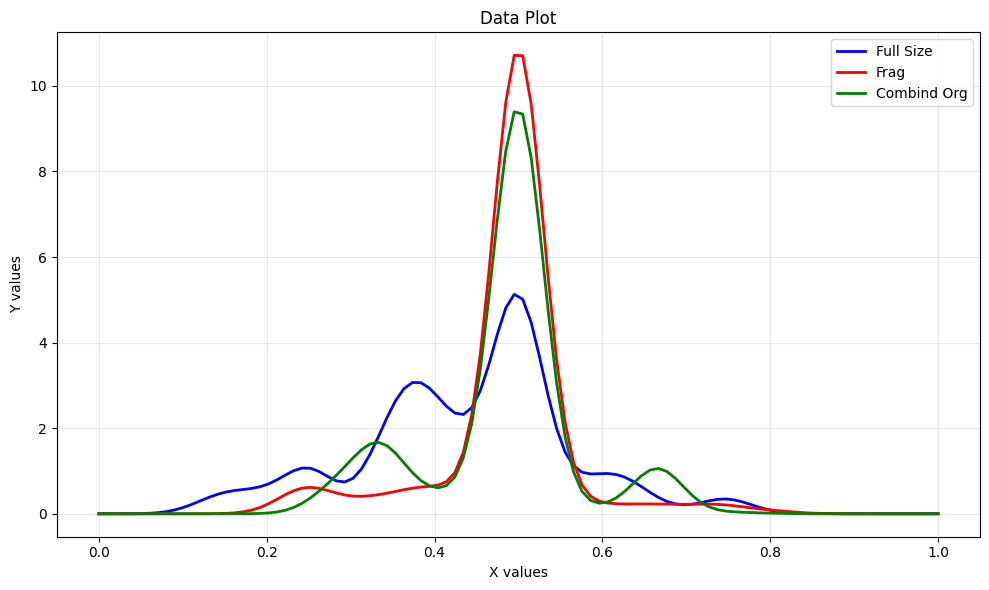

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(x_data_full_size, y_data_full_size, 'b-', linewidth=2, label='Full Size')
plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('Data Plot')
plt.grid(True, alpha=0.3)

plt.plot(x_data_frag, y_data_frag, 'r-', linewidth=2, label='Frag')

plt.plot(x_data_combind_org, y_data_combind_org, 'g-', linewidth=2, label='Combind Org')

plt.legend()



# Optional: Add some styling
plt.tight_layout()

# Show the plot
plt.show()